In [2]:
#ML final project
#Yu Zhou, Che Wang

#this one is test file for adding in the training history recordings.

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np
import keras
from keras import backend as K
import matplotlib.image as mpimg
from glob import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# A bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc
"""datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')"""
#don't worry about data augmentation for now...
#data preprocessing is done in another file
print()

In [3]:

globPaths = ['data/c0small/*.jpg','data/c1small/*.jpg','data/c2small/*.jpg','data/c3small/*.jpg','data/c4small/*.jpg',
            'data/c5small/*.jpg','data/c6small/*.jpg','data/c7small/*.jpg',
            'data/c8small/*.jpg','data/c9small/*.jpg']
num_classes = 10
numTrain = 1500

X_train = np.empty((15000,64,64,3))
X_test = np.empty((4000,64,64,3))
y_train = np.empty((15000))
y_test = np.empty((4000))

i = 0
j = 0

#now only set data to two class 
for folderIndex in range(10):
    index = 0
    filelist = glob(globPaths[folderIndex])
    for filename in filelist:
        newImg = misc.imread(filename)
        if index<numTrain:
            X_train[i] = newImg
            y_train[i] = folderIndex
            i+=1
        else:
            X_test[j] = newImg
            y_test[j] = folderIndex
            j+=1
        index+=1
        if index%200==0:
            print("reading img,",folderIndex,index)
        
        
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#then data normalization
X_train /= 255
X_test /= 255


print("y_train",y_train.shape[0])
print("y_test",y_test.shape[0])

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)
print("data read and normalization finished!")



reading img, 0 200
reading img, 0 400
reading img, 0 600
reading img, 0 800
reading img, 0 1000
reading img, 0 1200
reading img, 0 1400
reading img, 0 1600
reading img, 0 1800
reading img, 1 200
reading img, 1 400
reading img, 1 600
reading img, 1 800
reading img, 1 1000
reading img, 1 1200
reading img, 1 1400
reading img, 1 1600
reading img, 1 1800
reading img, 2 200
reading img, 2 400
reading img, 2 600
reading img, 2 800
reading img, 2 1000
reading img, 2 1200
reading img, 2 1400
reading img, 2 1600
reading img, 2 1800
reading img, 3 200
reading img, 3 400
reading img, 3 600
reading img, 3 800
reading img, 3 1000
reading img, 3 1200
reading img, 3 1400
reading img, 3 1600
reading img, 3 1800
reading img, 4 200
reading img, 4 400
reading img, 4 600
reading img, 4 800
reading img, 4 1000
reading img, 4 1200
reading img, 4 1400
reading img, 4 1600
reading img, 4 1800
reading img, 5 200
reading img, 5 400
reading img, 5 600
reading img, 5 800
reading img, 5 1000
reading img, 5 1200
read

In [4]:
#here we can save x and y as numpy files so it's easier to use them again
#np.save("X_train.npy",X_train)
#np.save("X_test.npy",X_test)
#np.save("Y_train.npy",Y_train)
#np.save("Y_test.npy",Y_test)
#print("Successfully save data to numpy files!")

In [5]:
# input image dimensions
img_rows, img_cols = 64, 64
img_channels = 3
#the later are about training...

input_shape = (img_rows, img_cols, img_channels)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding= 'same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, #keras.optimizers.Adadelta(0.01),
              metrics=['accuracy'])
print("model building and compiling finished!")


model building and compiling finished!


In [6]:
#from keras.utils import plot_model
#plot the model as png
#plot_model(model, to_file='model.png',show_shapes=True)

In [11]:

#only use a small amount of data for 
X_train = X_train[:100,:]
Y_train = Y_train[:100,:]
X_test = X_test[:100,:]
Y_test = Y_test[:100,:]

batch_size = 32 
nb_training_stages = 1 #at the end of each stage, we save the model
nb_epoch = 10
RESUME = False
resume_filepath = 'keras_cnn_model_historytest.h5'
saveNamePrefix = 'keras_cnn_model_historyTest_'
if RESUME:
    print('model resumed! filepath: '+resume_filepath)
    model = keras.models.load_model(resume_filepath)

#score = model.evaluate(X_test[:150], Y_test[:150], verbose=0)
#print('Original test loss estimate:', score[0])
#print('Original test accuracy estimate:', score[1])
history = 0
for stage in range(nb_training_stages):
    history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))

    pred = model.predict(X_train,batch_size=10)
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(history)
#model.load(filename)




Train on 100 samples, validate on 100 samples
Epoch 1/10
100/100 [==============================] - 4s - loss: 9.0081e-06 - acc: 1.0000 - val_loss: 2.5790e-04 - val_acc: 1.0000
Epoch 2/10
100/100 [==============================] - 4s - loss: 1.4365e-06 - acc: 1.0000 - val_loss: 2.3311e-04 - val_acc: 1.0000
Epoch 3/10
100/100 [==============================] - 3s - loss: 1.5533e-06 - acc: 1.0000 - val_loss: 2.0069e-04 - val_acc: 1.0000
Epoch 4/10
100/100 [==============================] - 3s - loss: 1.2887e-06 - acc: 1.0000 - val_loss: 1.7272e-04 - val_acc: 1.0000
Epoch 5/10
100/100 [==============================] - 5s - loss: 8.6427e-07 - acc: 1.0000 - val_loss: 1.4559e-04 - val_acc: 1.0000
Epoch 6/10
100/100 [==============================] - 3s - loss: 1.1343e-06 - acc: 1.0000 - val_loss: 1.1739e-04 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 4s - loss: 4.3988e-07 - acc: 1.0000 - val_loss: 1.0428e-04 - val_acc: 1.0000
Epoch 8/10
100/100 [=================

In [12]:
for i in range(10):
    

{'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [9.0080961399507935e-06, 1.4364789967657999e-06, 1.5533062196482206e-06, 1.2886593754046771e-06, 8.6426921370730274e-07, 1.1342843845341123e-06, 4.398827888962842e-07, 6.3836747585810374e-07, 3.5822471545543521e-07, 4.6193741695788051e-07], 'acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.00025789877749048172, 0.00023311032215133308, 0.00020068634650669993, 0.00017271965567488222, 0.00014558865572325886, 0.00011738914647139608, 0.00010427997796796262, 8.4281045419629661e-05, 7.3023987933993343e-05, 5.8488555660005658e-05]}


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


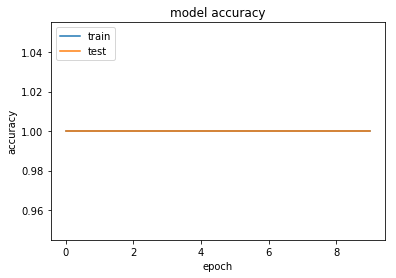

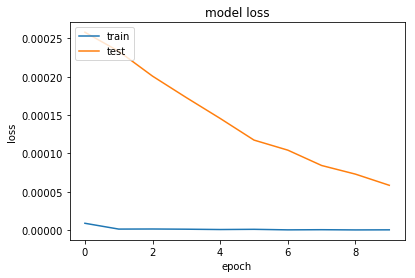

In [14]:
print(history.history['val_acc'])
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
def writeHistoryToFile(his,filename):
    hisFile = open(filename, "w")
    hisFile.write("epoch acc val_acc loss val_loss\n")
    hisData = his.history
    acc = hisData['acc']
    loss = hisData['loss']
    val_acc = hisData['val_acc']
    val_loss = hisData['val_loss']
    n = len(acc)
    print(n)
    for i in range(n):
        ss = " ".join([str(i),str(acc[i]),str(val_acc[i]),str(loss[i]),str(val_loss[i]),"\n"])
        hisFile.write(ss)
writeHistoryToFile(history,"testfile.txt")

10
